
***THE SPARKS FOUNDATION***
* Data Science & Business Analytics Internship (#GRIPMARCH21)
* Created By : Harshil Roy


Problem Statement :-
Task 3 - To Explore Decision Tree Algorithm:
- In this task, we will create a Decision Tree classifier for the Iris Dataset and visualize it graphically. We will also evaluate our classifier's performance.
Solution
Step 1 : Importing Required Libraries -

In [3]:
# Python Libraries:
import pandas as pd
import numpy as np


# Libraries for Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Library required for splitting data in Train and Test:
from sklearn.model_selection import train_test_split

# Library required for Decision Tree:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Library required for Ignoring Warning:
import warnings
warnings.filterwarnings("ignore")

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
df = pd.read_csv('~/Documents/DSE - Great Lakes Study/The Sparks Foundation/Task 2/Iris.csv',index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking first 5 rows:

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Five Number Summary:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
print("The number of rows in data :-", df.shape[0])

The number of rows in data :- 150


In [9]:
print("The number of columns in data :-", df.shape[1])

The number of columns in data :- 5


In [10]:
(df.isnull().sum()/len(df))*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

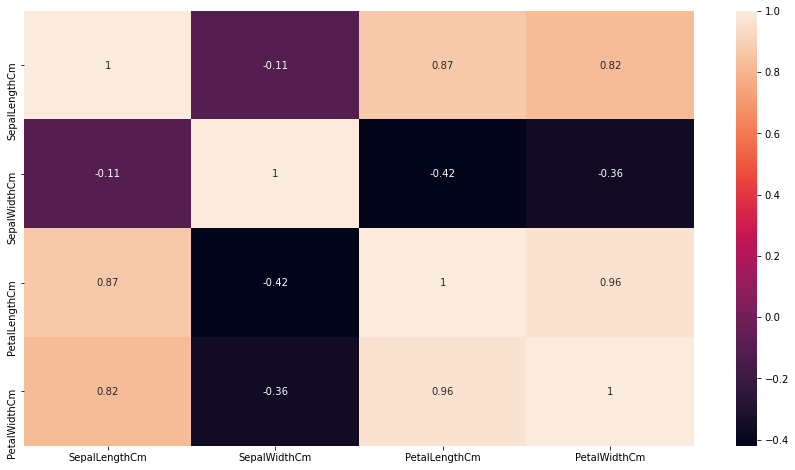

In [11]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
species = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [14]:
df['Species'] = df['Species'].map(species)

In [15]:
df.Species.unique()

array([0, 1, 2])

In [24]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5:5].values

In [25]:
X.shape, y.shape

((150, 4), (150, 0))

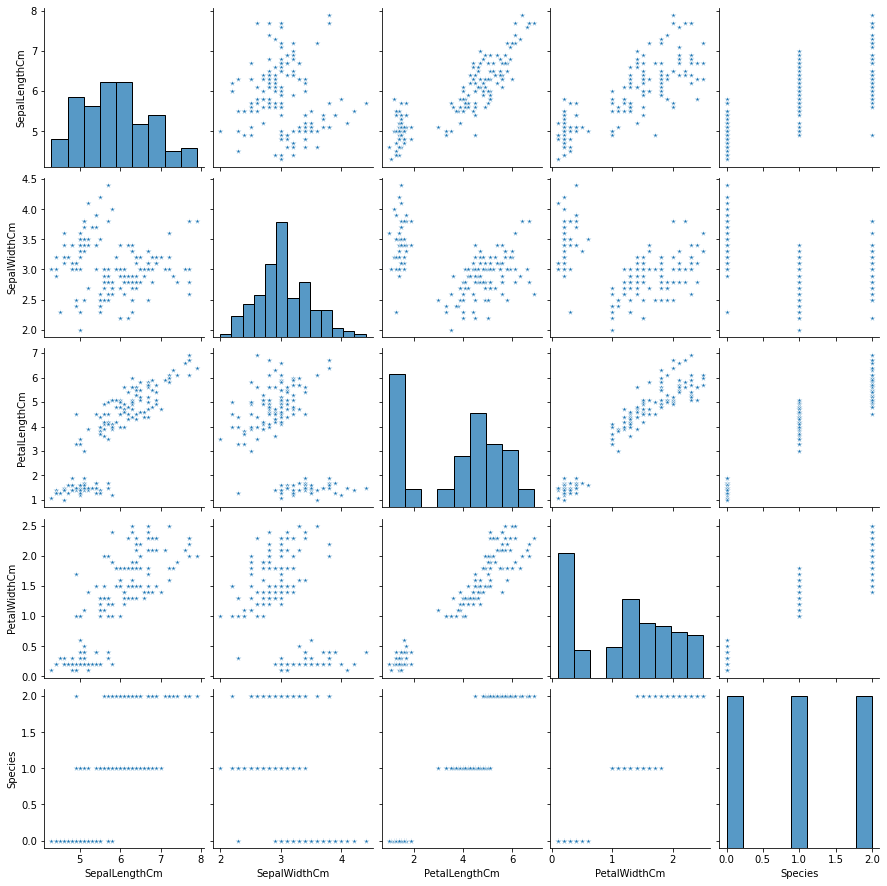

In [33]:
sns.pairplot(df, markers = '*')
plt.show()

### Step 4 : Decision Tree Classification using scikit-learn -

In [34]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [35]:
y = df[['Species']]

- Spliting the Dataset into Train and Test Split -

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# print dimension of train set:
print('X_train', X_train.shape)
print('y_train', y_train.shape) 


# print dimension of test set:
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (120, 4)
y_train (120, 1)
X_test (30, 4)
y_test (30, 1)


- Building a Decision Tree Classifier -

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

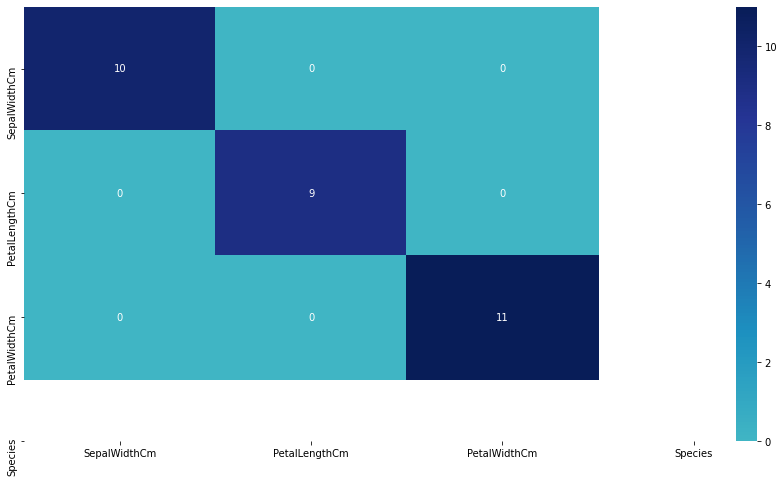

In [40]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = df.iloc[:, 1:5].columns.values,  yticklabels = df.iloc[:, 1:5].columns.values, center = 0, annot = True,cmap = 'YlGnBu')
plt.show()

Checking value for Precision, Recall and F1 Score.

In [41]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


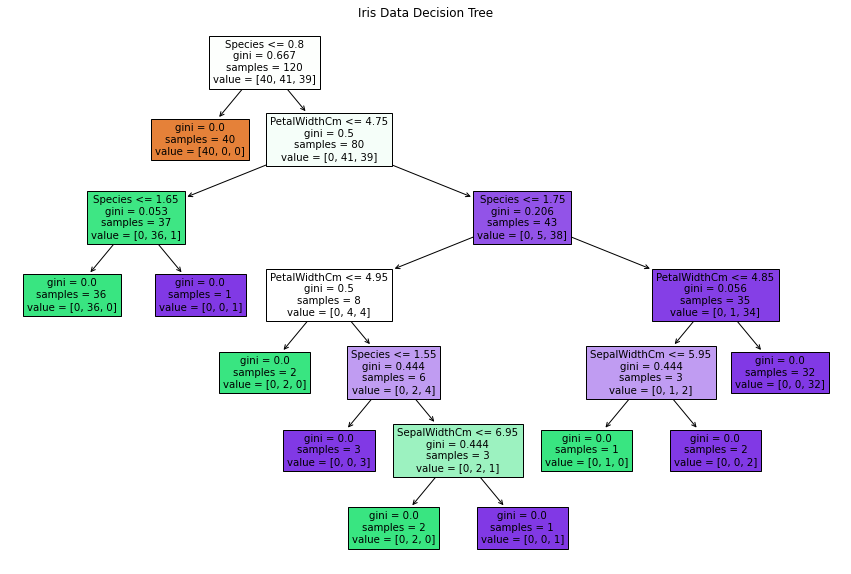

In [42]:
# Plotting Decision Tree:

plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

Thank You!!